In [332]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [333]:
df = pd.read_csv('telecom_churn_data.csv')

In [334]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


**Data Cleaning Steps:**
- Mobile No should be unique
- arpu_6, arpu_7 are important

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [336]:
print(list(df.columns))

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou

In [337]:
df['arpu_6'].head(20)

0      197.385
1       34.047
2      167.690
3      221.338
4      261.636
5       50.258
6      429.023
7     1069.180
8      378.721
9      119.518
10       0.400
11     298.126
12      48.570
13     492.846
14      63.611
15      31.000
16     430.975
17     690.008
18       4.000
19     163.430
Name: arpu_6, dtype: float64

In [338]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])

In [339]:
null_df.sort_values(by='C',ascending=False).head(50)

,C
arpu_3g_6,74.846748
night_pck_user_6,74.846748
total_rech_data_6,74.846748
arpu_2g_6,74.846748
max_rech_data_6,74.846748
fb_user_6,74.846748
av_rech_amt_data_6,74.846748
date_of_last_rech_data_6,74.846748
count_rech_2g_6,74.846748
count_rech_3g_6,74.846748


# Step 1: Filtering High Value Customers

**Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).**

**Hence, the columns to be considered are: total_rech_amt_6, total_rech_amt_7, av_rech_amt_data_6, av_rech_amt_data_7, total_rech_data_6, total_rech_data_7.**     

In [340]:
#Checking the nulls in the dataset for these particular columns
print(df['total_rech_amt_6'].isnull().sum())
print(df['total_rech_amt_7'].isnull().sum())
print(df['av_rech_amt_data_6'].isnull().sum())
print(df['av_rech_amt_data_7'].isnull().sum())
print(df['total_rech_data_6'].isnull().sum())
print(df['total_rech_data_7'].isnull().sum())

0
0
74846
74428
74846
74428


In [341]:
#Imputing the missing values with zeros
df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].fillna(0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].fillna(0)
df['total_rech_data_6'] = df['total_rech_data_6'].fillna(0)
df['total_rech_data_7'] = df['total_rech_data_7'].fillna(0)

**Similarly, we take the same decision to impute the missing values as zeroes for corresponding columns in action phase 8.**

In [342]:
print(df['total_rech_amt_8'].isnull().sum())
print(df['av_rech_amt_data_8'].isnull().sum())
print(df['total_rech_data_8'].isnull().sum())

0
73660
73660


In [343]:
#Imputing the missing values with zeroes for the corresponding columns in the action phase - 8
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].fillna(0)
df['total_rech_data_8'] = df['total_rech_data_8'].fillna(0)

In [344]:
#Finding the totals for months 6 and 7 
df['total_rech_amt_6_7'] = df['total_rech_amt_6'] + df['total_rech_amt_7']

In [345]:
#Finding the total recharge data amount for months 6 and 7
df['total_rech_data_amt_6_7'] = df['av_rech_amt_data_6']*df['total_rech_data_6']+df['av_rech_amt_data_7']*df['total_rech_data_7']

In [346]:
#Average recharge amount for months 6 & 7
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6_7']+df['total_rech_data_amt_6_7'])/2

In [347]:
#Finding the 70th percentile for finding the high value customers
high_val = df['avg_rech_amt_6_7'].quantile(0.7)

In [348]:
print(high_val)

478.0


In [349]:
df['highvalcust'] = df['avg_rech_amt_6_7'].apply(lambda x: 1 if x>high_val else 0)

In [350]:
df[['highvalcust','avg_rech_amt_6_7']]

,highvalcust,avg_rech_amt_6_7
0,1,559.0
1,0,306.0
2,0,241.5
3,0,270.0
4,0,301.0
...,...,...
99994,0,85.0
99995,0,110.0
99996,0,98.5
99997,1,1602.0


In [351]:
df['highvalcust'].value_counts()

0    70046
1    29953
Name: highvalcust, dtype: int64

In [352]:
df = df[df['highvalcust']==1]

In [353]:
df.shape

(29953, 230)

In [354]:
#Check nulls again

In [355]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])

In [356]:
null_df.sort_values(by='C',ascending=False).head(50)

,C
date_of_last_rech_data_9,49.253831
arpu_2g_9,49.253831
night_pck_user_9,49.253831
count_rech_2g_9,49.253831
total_rech_data_9,49.253831
fb_user_9,49.253831
count_rech_3g_9,49.253831
av_rech_amt_data_9,49.253831
arpu_3g_9,49.253831
max_rech_data_9,49.253831


# Step 2: Creating the column - Churn

**As per assignment guidelines: Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:**
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [357]:
#Checking the nulls
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()/len(df.index)*100

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [358]:
#Checking the nulls
df[['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']].isnull().sum()/len(df.index)*100

total_ic_mou_8    0.0
total_og_mou_8    0.0
vol_2g_mb_8       0.0
vol_3g_mb_8       0.0
dtype: float64

In [359]:
#Describe these columns
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,29953.000000,29953.000000,29953.000000,29953.000000
mean,265.079232,501.141639,91.405987,349.915812
std,358.502996,667.138160,282.104414,947.700826
min,0.000000,0.000000,0.000000,0.000000
25%,50.490000,47.730000,0.000000,0.000000
50%,158.030000,285.130000,0.000000,0.000000
75%,343.960000,698.790000,38.020000,321.570000
max,7785.730000,11517.730000,8993.950000,39221.270000


In [360]:
#Finding the total usage in Month 9
df['total_usage_9'] = df['total_ic_mou_9']+df['total_og_mou_9']+df['vol_2g_mb_9']+df['vol_3g_mb_9']

In [361]:
#Creating the column - churn using the total usage in Month 9
df['churn'] = df['total_usage_9'].apply(lambda x: 0 if x>0 else 1)

In [362]:
#Here we confirm if the churn column was prepared properly
print(df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']])

       total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  churn
0                0.00            0.00         0.00         0.00      1
7                0.00            0.00         0.00         0.00      1
8               34.91          142.18         0.00         0.00      0
21             252.61         1031.53         0.00         0.00      0
23             127.48          127.63        13.93       314.74      0
...               ...             ...          ...          ...    ...
99981          391.63           64.21         0.00         0.00      0
99984          149.26           14.44       723.41       232.56      0
99986          547.11         1095.24         9.14       941.48      0
99988          265.84          182.16         0.05       393.34      0
99997            2.21            0.00        85.67      4177.14      0

[29953 rows x 5 columns]


In [363]:
#Find the value_counts for the churn
df['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

**Hence, there are 2433 people who have churned out of the 29953. Lets visualize it better in a pie chart.**

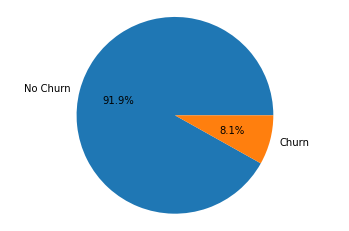

This is a class imbalance problem , which will be later handled using SMOTE technique


In [364]:
#Pie chart for the target variable - Churn
labels = ['No Churn','Churn']
sizes = [df['churn'].value_counts()[0],df['churn'].value_counts()[1]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()
plt.show()
print('This is a class imbalance problem , which will be later handled using SMOTE technique')

**As we have created the desired column 'churn', we can now remove all the columns for month 9 as guided in the problem statement.**

In [365]:
text = '_9'
filtered_9 = list(filter(lambda x: True if text in x else False,list(df.columns)))

In [366]:
filtered_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [367]:
#Dropping the columns for September
df = df.drop(filtered_9,axis = 1)

In [368]:
#No of columns
df.shape

(29953, 177)

**Understanding all the columns in filtered_9 but for 6,7,8 & then find:**
1. What will be the derived columns? 

**Other strategies:**
1. Non date columns: We can find average for 6 & 7, and then subtract from 8 to see change in behaviour
2. Date columns: Find no of days from end of september to last recharge, between two recharges

In [369]:
#Categorical columns
columns_list=df.select_dtypes(include=['object']).columns.to_list()
print(columns_list)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [370]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])

In [371]:
null_df.sort_values(by='C',ascending=False).head(50)

,C
count_rech_3g_8,46.799987
count_rech_2g_8,46.799987
fb_user_8,46.799987
arpu_3g_8,46.799987
date_of_last_rech_data_8,46.799987
max_rech_data_8,46.799987
arpu_2g_8,46.799987
night_pck_user_8,46.799987
count_rech_2g_6,44.112443
date_of_last_rech_data_6,44.112443


# Step 3: Null Value Treatment

**Dealing with the Date columns**

In [372]:
df[columns_list].isnull().sum()/len(df.index)*100

last_date_of_month_6         0.000000
last_date_of_month_7         0.090141
last_date_of_month_8         0.550863
date_of_last_rech_6          0.243715
date_of_last_rech_7          0.327179
date_of_last_rech_8          1.943044
date_of_last_rech_data_6    44.112443
date_of_last_rech_data_7    43.117551
date_of_last_rech_data_8    46.799987
dtype: float64

In [373]:
df['last_date_of_month_6'].value_counts()

6/30/2014    29953
Name: last_date_of_month_6, dtype: int64

In [374]:
df['last_date_of_month_7'].value_counts()

7/31/2014    29926
Name: last_date_of_month_7, dtype: int64

In [375]:
df['date_of_last_rech_6'].value_counts()

6/30/2014    8365
6/29/2014    5327
6/28/2014    3661
6/27/2014    3155
6/26/2014    1823
6/25/2014    1323
6/24/2014    1041
6/23/2014     697
6/21/2014     638
6/14/2014     549
6/22/2014     525
6/17/2014     454
6/20/2014     397
6/19/2014     387
6/18/2014     387
6/12/2014     211
6/13/2014     210
6/16/2014     203
6/15/2014     141
6/11/2014      81
6/8/2014       60
6/7/2014       47
6/10/2014      47
6/5/2014       33
6/9/2014       27
6/3/2014       25
6/6/2014       24
6/4/2014       19
6/2/2014       13
6/1/2014       10
Name: date_of_last_rech_6, dtype: int64

**Based on the date columns, we are doing the following:**
1. Dropping the columns: date_of_last_rech_data because there are too many nulls (>40%) in these columns and no imputation method will be suitable for this column as it represents the last date of data recharge. 
2. Dropping the null rows for columns: date_of_last_rech because it is less 2 percent data and can be removed.
3. Imputing the null rows for columns: last_date_of_month with the respective last date of each month. It will be used.

**For other continuous columns which have null values, we are imputing them as zeros.**

In [376]:
#Dropping the columns date_of_last_rech_data
df = df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis = 1)

In [377]:
#Dropping the null rows for columns: date_of_last_rech
df = df[~(df['date_of_last_rech_6'].isnull())]
df = df[~(df['date_of_last_rech_7'].isnull())]
df = df[~(df['date_of_last_rech_8'].isnull())]

In [378]:
#Categorical columns
columns_list=df.select_dtypes(include=['object']).columns.to_list()
print(columns_list)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [380]:
#Categorical columns
columns_list=df.select_dtypes(include=['object']).columns.to_list()
print(columns_list)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [381]:
df[columns_list].isnull().sum()/len(df.index)*100

last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
date_of_last_rech_6     0.0
date_of_last_rech_7     0.0
date_of_last_rech_8     0.0
dtype: float64

In [382]:
df.shape

(29262, 174)

**As mentioned earlier, the rest of the columns which are continuous in nature can be imputed as zeros.**

In [383]:
df = df.fillna(0)

In [385]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])

In [386]:
null_df.sort_values(by='C',ascending=False).head(50)

,C
mobile_number,0.0
total_rech_data_6,0.0
max_rech_amt_7,0.0
max_rech_amt_8,0.0
date_of_last_rech_6,0.0
date_of_last_rech_7,0.0
date_of_last_rech_8,0.0
last_day_rch_amt_6,0.0
last_day_rch_amt_7,0.0
last_day_rch_amt_8,0.0


# Step 4: Exploratory Data Analysis

**Combining all the columns of 6 & 7 into new columns for the good phase having avg values.**

In [390]:
# total_ic_mou
df['total_ic_mou_drop']= ((df['total_ic_mou_6']+df['total_ic_mou_7'])/2)

<AxesSubplot:xlabel='churn', ylabel='total_ic_mou_drop'>

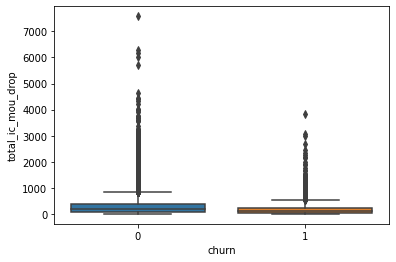

In [391]:
sns.boxplot(x='churn',y='total_ic_mou_drop',data=df)

In [ ]:
#Data Imbalance Treatment: Rahul

In [58]:
#Prepare Model 1: without PCA: Sumiran

In [ ]:
#Prepare Model 2: with PCA